<a href="https://colab.research.google.com/github/shashanksrajak/data-structure-algorithms/blob/main/binary_search_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Search Tree

Key Points
- Special type of Binary Tree used primarily for searching elements.
- The left side of a node contains smaller elements and right side contains larger elements.
- No duplicates

What we need to study?
- Insertion of a node
- Creation of BST
- Searching a key
- Deleting a key

In [7]:
import graphviz
from collections import deque

In [36]:
class Node:
  def __init__(self, data):
    self.data = data
    self.left = None
    self.right = None

class BinarySearchTree:
  def __init__(self):
    self.root = None

  def insert(self, data):
    """
    We insert a node if it is not present already in the tree.
    """
    node = Node(data)
    if self.root is None:
      # the tree is empty so we create this new node as root
      self.root = node
    else:
      # once the loop is done, it means the data is not present, but we also need to keep a pointer to the last node from wehere it exited.
      ptr = self.root
      while ptr:
        tail = ptr
        if data == ptr.data:
          raise Exception("Duplicate values not allowed.")
        elif data < ptr.data:
          # move left
          ptr = ptr.left
        else:
          # move right
          ptr = ptr.right

      # ptr has already become None, but tail is poitning to the prev position of ptr where we need to insert this data
      if data > tail.data:
        # insert right
        tail.right = node
      else:
        # insert left
        tail.left = node

  def search(self, key):
    """
    Search for a key in BST and returns it, if not found returns None
    """
    ptr = self.root
    while ptr:
      if key == ptr.data:
        return ptr
      elif key < ptr.data:
        # move left
        ptr = ptr.left
      else:
        # move right
        ptr = ptr.right

    # the key was not found
    return None
  
  def delete(self, key):
    """
    Delete a node from tree
    """
    ptr = self.root
    parent = None
    while ptr:
      if key == ptr.data:
        # delete operation
        
        # case 1 : its a leaf node 
        if ptr.left is None and ptr.right is None:
          if ptr.data > parent.data:
            # right side
            parent.right = None
          else:
            # left side
            parent.left = None
          return
        # case 2 : one of the child is None
        # we can simply remove this node and point parent to its child
        elif ptr.left is None or ptr.right is None:
          if ptr.data > parent.data:
            # right side
            if ptr.left:
              parent.right = ptr.left
            else:
              parent.right = ptr.right
          else:
            # left side
            if ptr.left:
              parent.left = ptr.left
            else:
              parent.right = ptr.right
          return
        # case 3 : when both child are present
        else:
          left_max = self.find_max(ptr.left) # in order predecessor
          self.delete(left_max.data)

          ptr.data = left_max.data
          
          return
      elif key < ptr.data:
        # move left
        parent = ptr
        ptr = ptr.left
      else:
        # move right
        parent = ptr
        ptr = ptr.right

    # the key to delete was not found
    return None

  def find_max(self, node: Node):
      ptr = node
      tail = ptr
      while ptr:
        tail = ptr
        if ptr.right:
          ptr = ptr.right
        else:
          break

      return tail

In [37]:
A = [30, 20, 40, 15, 25, 35, 50]


In [38]:
bst = BinarySearchTree()

# create a bst
for a in A:
  bst.insert(a)

In [39]:
bst.root.data

30

In [40]:
nodes = []

def traverse_tree(node: Node):
  if node is None:
    return
  nodes.append(node)
  traverse_tree(node.left)
  traverse_tree(node.right)



def display_tree(root: Node):
  dot = graphviz.Digraph(comment='Binary Search Tree')
  global nodes
  nodes = []
  traverse_tree(root)

  for node in nodes:
    dot.node(name=str(node.data), label=str(node.data))

  for node in nodes:
    if node.left:
      dot.edge(str(node.data), str(node.left.data))
    if node.right:
      dot.edge(str(node.data), str(node.right.data))
  return dot

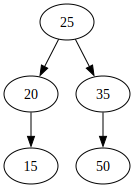

In [45]:
display_tree(bst.root)

In [14]:
bst.insert(14)

In [15]:
s = bst.search(35)
print(s.data) if s else print("Not found!!!")

35


In [44]:
bst.delete(30)